
x_train : 
    torch.Size([8, 4]) tensor([[1., 2., 1., 1.],
            [2., 1., 3., 2.],
            [3., 1., 3., 4.],
            [4., 1., 5., 5.],
            [1., 7., 5., 5.],
            [1., 2., 5., 6.],
            [1., 6., 6., 6.],
            [1., 7., 7., 7.]])

y_train : 
    torch.Size([8]) tensor([2, 2, 2, 1, 1, 1, 0, 0])

y_one_hot : 
    torch.Size([8, 3]) tensor([[0., 0., 1.],
            [0., 0., 1.],
            [0., 0., 1.],
            [0., 1., 0.],
            [0., 1., 0.],
            [0., 1., 0.],
            [1., 0., 0.],
            [1., 0., 0.]])

-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 8.788898 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 11.492296 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 35.407791 

-------------------------------------------------------------

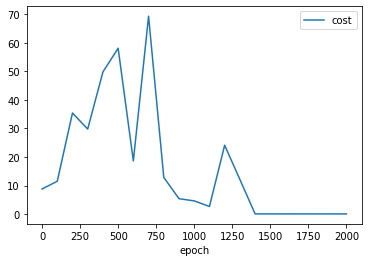

In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

mu.log("x_train", x_train)
mu.log("y_train", y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(dim=1, index=y_train.unsqueeze(dim=1), value=1)
mu.log("y_one_hot", y_one_hot)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum().mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        mu.log_epoch(epoch, nb_epoches, cost)

mu.plt_show()